<a href="https://colab.research.google.com/github/Eduard25/Redes/blob/master/Tarea6_3-a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation, Layer, Input, Flatten
from keras.optimizers import RMSprop, Adam

from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
loss_tracker = keras.metrics.Mean(name="loss")

In [8]:
class coeficientes(Layer):

    def __init__(self, units=32, activation=None):
        super(coeficientes,self).__init__()
        self.units=units
        self.activation=tf.keras.activations.get(activation)

    def build(self, input_shape):

        a_init = tf.random_normal_initializer()
        a_init_val = a_init(shape=(input_shape[-1],self.units),dtype= 'float32')
        self.a = tf.Variable(initial_value=a_init_val, trainable='true')

        b_init = tf.random_normal_initializer()
        b_init_val = b_init(shape=(input_shape[-1],self.units),dtype= 'float32')
        self.b = tf.Variable(initial_value=b_init_val, trainable='true')

        c_init= tf.zeros_initializer()
        c_init_val = c_init(shape=(self.units,),dtype='float32')
        self.c = tf.Variable(initial_value=c_init_val,trainable='true')

        d_init= tf.zeros_initializer()
        d_init_val = d_init(shape=(self.units,),dtype='float32')
        self.d = tf.Variable(initial_value=c_init_val,trainable='true')


    def call(self, inputs):
        x_triple= tf.math.pow(inputs, 3)
        x_triple_times_a= tf.matmul(x_triple,self.a)
        x_squared= tf.math.square(inputs)
        x_squared_times_b = tf.matmul(x_squared,self.b)
        x_times_c= tf.matmul(inputs,self.c)
        x3a_plus_x2b_plus_xc_plus_d = x_triple_times_a+x_squared_times_b+x_times_c+self.d

        return self.activation(x3a_plus_x2b_plus_xc_plus_d)

In [4]:
class Funsol(Sequential):
    @property
    def metrics(self):
        return [loss_tracker]

    def train_step(self, data):
        batch_size =100
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1)
        f = tf.math.cos(2*x)


        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            #loss = keras.losses.mean_squared_error(y_pred,eq)
            loss = tf.math.reduce_mean(tf.math.square(y_pred-f))

        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        #actualiza metricas
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}

In [18]:
model = Funsol()

model.add(coeficientes(500,activation='tanh', input_shape=(28,28)))
model.add(coeficientes(150,activation='tanh'))
model.add(coeficientes(150,activation='relu'))
model.add(coeficientes(1))

model.summary()

TypeError: coeficientes.__init__() got an unexpected keyword argument 'input_shape'

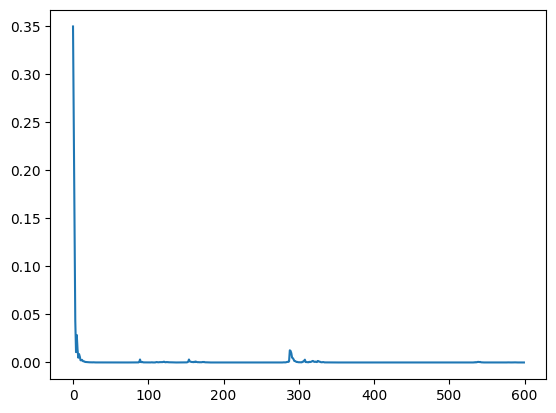

In [6]:
model.compile(optimizer=Adam(), metrics=['loss'])

x=tf.linspace(-1,1,100)

history = model.fit(x,epochs=600,verbose=0)
plt.plot(history.history["loss"])
plt.show()

4/4 [==============================] - 0s 8ms/step


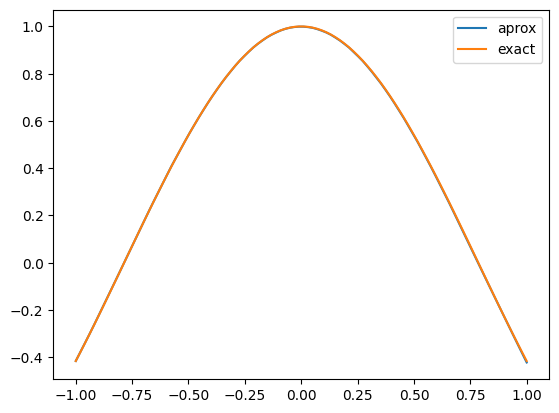

In [7]:
x_testv = tf.linspace(-1,1,100)
a=model.predict(x_testv)
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv,tf.math.cos(2*x),label="exact")
plt.legend()
plt.show()